# Demand

In [2]:
# HIDDEN
from datascience import *

import sympy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-muted')
%matplotlib inline

from IPython.display import display
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Introduction ##

In this chapter, we will explore one of the most foundational concepts in economics: demand curves. Supply and demand makes up markets, and understanding how demand works is important for future concepts. 

The demand curve shows the graphical relationship between the price of a good or service and the quantity demanded for it over a given period of time. In other words, it shows the quantity of goods or services consumers are willing to buy at each market price. The quantity of goods or services demanded or supplied is a function of price, as in   $$\text{Quantity} = f(\text{Price})$$

The curve decreases because of the law of demand, which states that as the price of a good or service increases, the quantity demanded for it decreases, assuming all other factors are held constant. This makes intuitive sense: as prices increase, fewer people are willing to pay the higher price for the same good. Naturally, as prices decrease, more people are willing to pay the lower price for the same good. Hence, the demand of a good or service is based on the price. This relationship is usually somewhat linear and can be found as $$\text{Quantity}_{d}=a * \text{Price}_{d} + b$$

This can be interpreted as: As the price unit increases by 1, there is an a unit increase/decrease in the quantity demanded. An example is $$\text{Quantity}_{d}=2 * \text{Price}_{d} + 3$$

Another concept is when price is dependent on quantity. In this case, we use an inverse demand function, as it is an inverse function of the demand function. Thus, price is a function of quantity, as shown by $$\text{Price} = f(\text{Quantity})$$ Because it is the inverse of a demand function, the inverse demand function for the example above will be $$\text{Price}_{d}=1/2*\text{Quantity}_{d}-3/2$$

### Shifts in Demand Curve###

The demand curve can shift out or in based on events happening in the real world. Some factors other than a change in price of the good/service are changes in 

*  buyer's income
*  consumer preferences
*  expectation of future price/supply/demand/etc.
* price of related goods

If any of these changes occur and causes the demand for the selected good/service to decrease, then the curve shifts to the left, as less of the good or service will be demanded at every price. During the 2008 recession, consumers' incomes decreased. Because their buying power decreased, they purchased fewer items even though the prices of the select goods stayed the same. 

## Fruits Data ##

We will now explore the relationship between price and quantity of oranges produced between 1924 and 1938. In this chapter, we will focus on oranges. It is important to remember that this data is from the 1920's and 1930's, so the prices are much lower than what they would be today because of inflation, competition, innovations, etc. For example, in 1924, 41,880 tons of oranges would have costed 6.63 dollars as of 1924-dollars. That same amount in 2019 is 100.78 dollars. 


The source of this dataset is S. Hoos (1941). "An Investigation on Complementarity Relations Between
Fresh Fruits," Journal of Farm Economics, Vol. 23, #2, pp. 421-433.

In [4]:
fruitprice = Table.read_table('fruitprice.csv')
fruitprice

Year,Pear Price,Pear Unloads (Tons),Plum Price,Plum Unloads,Peach Price,Peach Unloads,Orange Price,Orange Unloads,NY Factory Wages
1924,8.04,18489,8.86,6582,4.96,41880,6.63,21258,27.22
1925,5.67,21919,7.27,5526,4.87,38772,9.19,15426,28.03
1926,5.44,29328,6.68,5742,3.35,46516,7.2,24762,28.89
1927,7.15,17082,8.09,5758,5.7,32500,8.63,22766,29.14
1928,5.81,20708,7.41,6000,4.13,46820,10.71,18766,29.34
1929,7.6,13071,10.86,3504,6.7,36990,6.36,35702,29.97
1930,5.06,22068,6.23,7998,6.35,29680,10.5,23718,28.68
1931,5.4,19255,6.86,5638,3.91,50940,5.81,39263,26.35
1932,4.06,17293,6.09,7364,4.57,27642,4.71,38553,21.98
1933,4.78,11063,5.86,8136,3.57,35560,4.6,36540,22.26


Because we are only examining the relationship between prices and quantity for oranges, we can create a new table with the relevant columns: Year, Orange Price, and Orange Unloads. 

In [5]:
oranges = fruitprice.select(["Year", "Orange Price", "Orange Unloads"])
oranges

Year,Orange Price,Orange Unloads
1924,6.63,21258
1925,9.19,15426
1926,7.2,24762
1927,8.63,22766
1928,10.71,18766
1929,6.36,35702
1930,10.5,23718
1931,5.81,39263
1932,4.71,38553
1933,4.6,36540


We can also rename columns. In this case, let's rename "Orange Unloads" to "Orange Quantity" for simplicity and comprehensibility. 

In [6]:
orangesRenamed = oranges.relabeled(["Orange Unloads", "Orange Price"], ["Quantity", "Price"])
orangesRenamed

Year,Price,Quantity
1924,6.63,21258
1925,9.19,15426
1926,7.2,24762
1927,8.63,22766
1928,10.71,18766
1929,6.36,35702
1930,10.5,23718
1931,5.81,39263
1932,4.71,38553
1933,4.6,36540


To construct the demand curve, let's first see what the relationship between price and quantity is. We want a downward-sloping line between price and quantity, because the demand curve is a downward-sloping curve that shows that if a product's prices increase, consumers will purchase less, and if a product's prices decrease, then consumers will purchase more. 

To find this, we will create a scatterplot and draw a regression line (`fit_line = True`) between the points. Regression lines are helpful because they consolidate all the datapoints into a single line, helping us better understand the relationship between the two variables. 

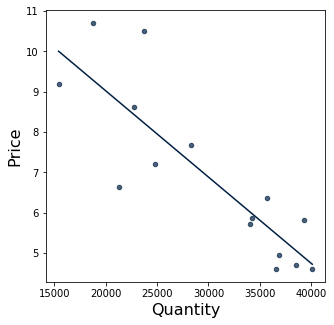

In [7]:
orangesRenamed.scatter("Quantity", "Price", fit_line = True)

We can see that there is a negative relationship between the two variables. Perfect! It is important to note that scatterplots only show positive, negative, or neutral correlations among two variables. If two variables have a positive correlation, then as one variable increases, the other increases too. If two variables have a negative correlation, then as one variable increass, the other decreases. If two variables have a neutral correlation, then if one varible increases, the other variable stays constant. Scatterplots do not show or prove causation between two variables-- it is up to the data scientists to prove any causation. 

We will now quantify our demand curve using NumPy's polyfit function. `np.polyfit` returns an array of size 2, where the 0th index is the slope and 1st index is the $y$-intercept.

The general template for the demand curve is $y = mx + b$, where $m$ is the slope and $b$ is $y$-intercept. In economic terms, $m$ is the demand curve's slope that shows how the good's price affects the quantity demanded, and $b$ encompasses the effects of all of the factors that are not price that affect demand. 

In [8]:
np.polyfit(orangesRenamed.column("Quantity"),orangesRenamed.column("Price"),1)

array([-2.14089690e-04,  1.33040264e+01])

This shows that the demand curve is $y = -0.000214x+ 13.3$. The slope is -0.000214 and $y$-intercept is 13.3. That means that as quantity increases by 1 unit (in this case, 1 ton), price decreases by 0.000214 units (in this case, \\$0.000214). 

We will now use SymPy to write out this demand curve. 

In [9]:
Q = sympy.Symbol("Q")
demand = -0.000214 * Q + 13.3
demand

-0.000214*Q + 13.3

Let's now assume that the supply curve is given by $y = 0.00023x + 0.8$. The supply curve is not based on data. Supply curves show how much of a good suppliers are willing and able to supply at different prices.

In [10]:
supply = 0.00023 * Q + 0.8
supply

0.00023*Q + 0.8

Quantity equilibrium is the quantity at which the supply curve and demand curve intersect. The quantity of the good that consumers desire to purchase is equivalent to the quantity of the good that producers supply. There is no shortage or surplus of the product at this quantity. 

Let's find the quantity equilibrium for this exercise.

In [11]:
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"

Q_star = solve(demand, supply)
Q_star

28153.1531531532

This means that the number of tons of oranges that consumers want to purchase and producers want to provide are about 28,153 tons of oranges. 

Price equilibrium is the price at which the supply curve and demand curve intersect. The price of the good that consumers desire to purchase at is equivalent to the price of the good that producers want to sell at. There is no shortage of surplus of the product at this price.

Let's find the price equilibrium. 

In [12]:
demand.subs(Q, Q_star)
supply.subs(Q, Q_star)

7.27522522522523

This means that the price of oranges in tons that consumers want to purchase at and producers want to provide is about \\$7.27. 

Now that we have our demand and supply curves and price and quantity equilibriums, we can visualize them on a graph to see what they look like. 

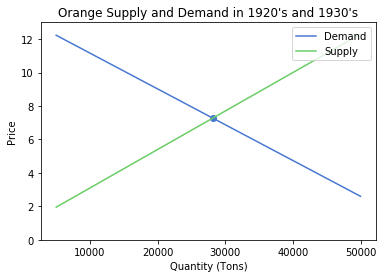

In [13]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)
    
plot_equation(demand, 5000, 50000, label = "Demand")
plot_equation(supply, 5000, 50000, label = "Supply")
plt.ylim(0,13)
plt.title("Orange Supply and Demand in 1920's and 1930's")
plt.xlabel("Quantity (Tons)")
plt.ylabel("Price")
plot_intercept(supply, demand)
plt.legend(loc = "upper right")
plt.show()

You can also practice on your own and download additional data sets here: http://users.stat.ufl.edu/~winner/datasets.html, courtesy of the University of Flordia's Statistics Department. 